In [1]:
%matplotlib inline
import os,argparse

import numpy as np
import cv2
from matplotlib import pyplot as plt
import torch
from dataloader import MRPGDataSet

In [2]:
parser = argparse.ArgumentParser()
# parser.add_argument('-seed', type=int, default=1)
# parser.add_argument('-dataset', type=str, default='airsim-mrmps-data')
# parser.add_argument('-batch_size', type=int, default=8)
opt = argparse.Namespace()
opt.seed = 1
opt.dataset = 'airsim-mrmps-data'
opt.batch_size = 1
opt.target = 'train'
dataset=MRPGDataSet(opt)
trainset, _ = torch.utils.data.random_split(dataset, [int(0.90 * len(dataset)),len(dataset) - int(0.90 * len(dataset))])
trainloader = torch.utils.data.DataLoader(trainset, batch_size=opt.batch_size, shuffle=True, num_workers=1)

[Loading all data]
[Number of samples for each camera: 2394]
[loading test data splits: airsim-mrmps-data/splits.pth]
[loading data stats: airsim-mrmps-data/data_stats.pth]


In [3]:
data = next(iter(trainloader))

Origin Image and Labels

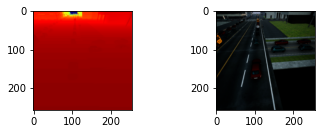

Pose:ftensor([-1.2293, -0.0390,  0.3548,  0.0586,  1.0977, -0.1052, -1.1129, -0.0792])
Pose:ftensor([-1.2293, -0.0395,  0.3319,  0.1661, -1.1364, -0.0684,  1.1503, -0.0352])


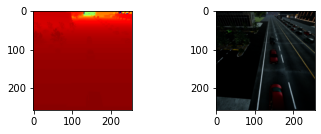

In [4]:
def visualize(data):
    camera_num = 2
    for i in range(camera_num):
        img = (data[0][0][i].permute(1, 2, 0)*255.).byte()
        pose = data[1][0][i]
        depth = (data[2][0][i].permute(1, 2, 0)*255.).byte()
        plt.subplot(2,camera_num,i*camera_num+1)
        plt.imshow(img)
        plt.subplot(2,camera_num,i*camera_num+2)
        plt.imshow(depth)
        plt.show()
        print(f"Pose:f{pose}")

visualize(data)

